In [1]:
using Plots

In [8]:
x1 = randn(10)
x2 = randn(10)
p = 0.2
q = 1 - p
a = -sqrt(p)
b = sqrt(q)
X = [x1 a*x1 + b*x2]
y = X*[1.0, 2.0] + randn(10)
A = X'X
b = X'y

2-element Array{Float64,1}:
  3.031288647077598
 13.130907264010068

In [15]:
function f(β1,β2)
    β = [β1,β2]
    return β'A*β/2 - β'b
end

f (generic function with 1 method)

In [10]:
A\b

2-element Array{Float64,1}:
 0.9593128600092934
 1.6752589238204458

In [17]:
x1 = Float64[]
x2 = Float64[]
z  = Float64[]
for β1=0:0.01:1.5
    for β2=1.5:0.01:3
        push!(x1,β1)
        push!(x2,β2)
        push!(z,f(β1,β2,A,b))
    end
end     

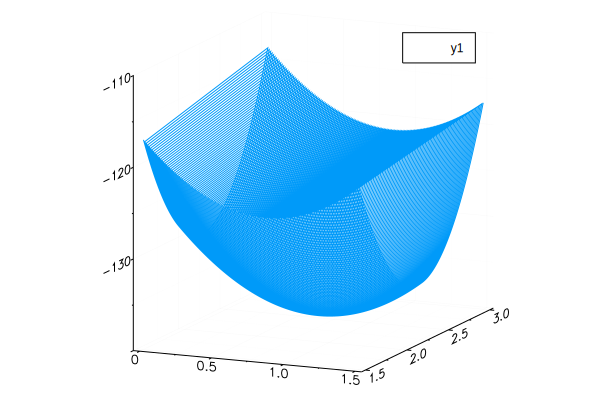

In [19]:
plot(x1,x2,z)

In [38]:
β1=0.0:0.005:3.0
β2=0.0:0.005:3.0
p1 = contour(β1,β2,f);

In [35]:
x0 = [0.0,0.0]
r0 = A*x0 - b
d0 = r0
α  = -d0'r0/(d0'A*d0)
x1 = x0 + α*d0
r1 = r0 + α*A*d0

2-element Array{Float64,1}:
 -8.2905941397087   
  1.9138954672315798

In [23]:
M = [0 0
     x1']

2×2 Array{Float64,2}:
 0.0       0.0    
 0.336473  1.45753

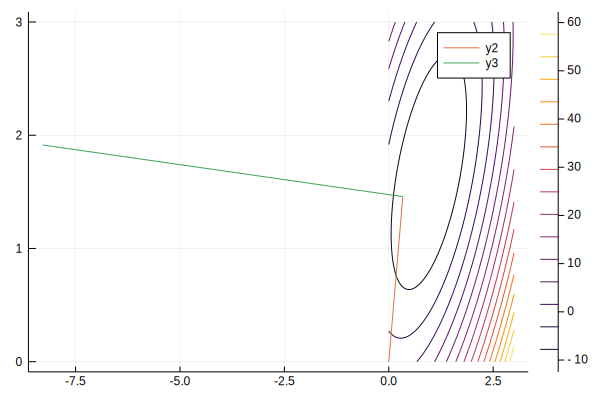

In [39]:
plot(p1)
plot!(p1,M[:,1],M[:,2])
plot!(p1,[x1[1],r1[1]],[x1[2],r1[2]])

In [45]:
β10 = d0'A*r1/(d0'A*d0)
d1 = r1 - β10*d0
α  = -d1'r1/(d1'A*d1)
x2 = x1 + α*d1
M = [x1';x2']

2×2 Array{Float64,2}:
 0.336473  1.45753
 0.959313  1.67526

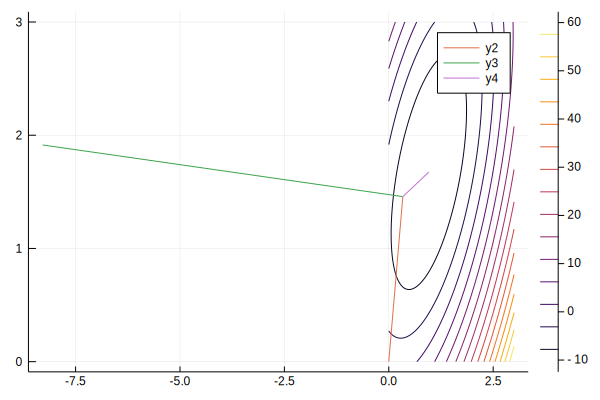

In [46]:
plot!(p1,M[:,1],M[:,2])

In [50]:
r0'r1

-4.263256414560601e-14